# Time Series Plot of Event Count:
* Plot the count of events over time (t).
* Helps in identifying periods of high or low event activity.

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from common import helpers
import re

# Load the data
iterator = helpers.load_evts_from_file(input("Enter file path: "))
df = helpers.evts_to_df(iterator)

# Convert to datetime and set index
df['t'] = pd.to_datetime(df['t'], unit='us', origin='unix')
df.set_index('t', inplace=True)
# Filter data by polarity
positive = df[df['p'] == 1]
negative = df[df['p'] == 0]


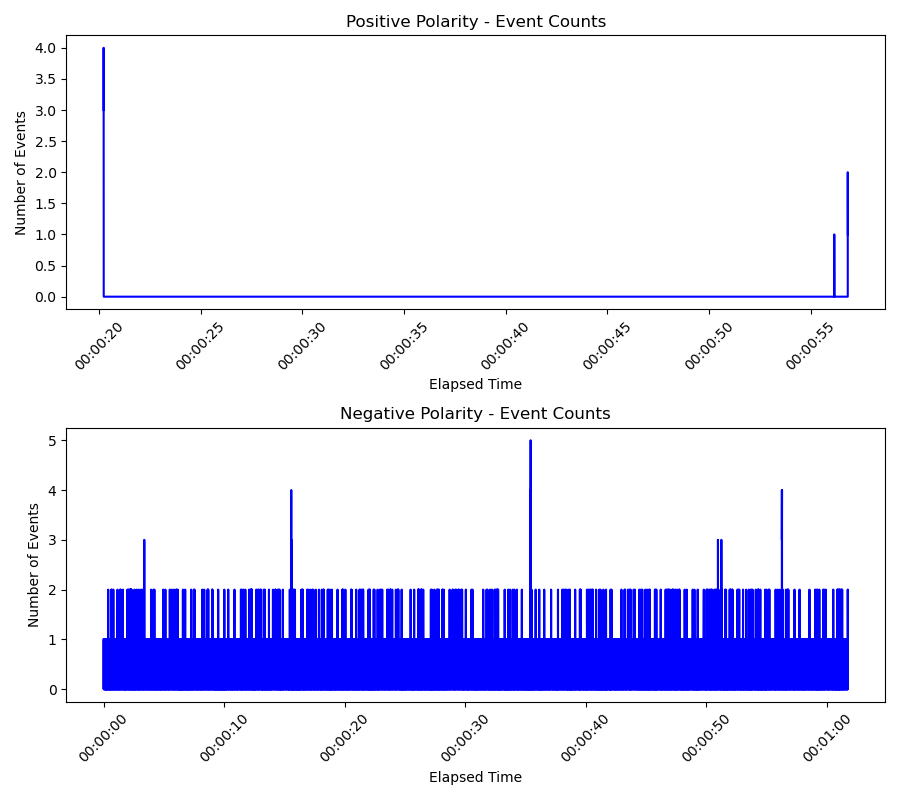

In [5]:
# Resample and count events in each bin
resample_frequency = '100us'  # Resampling every millisecond; adjust this as needed
positive_counts = positive.resample(resample_frequency).size()
negative_counts = negative.resample(resample_frequency).size()

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(9, 8))

# Plotting the resampled data
axes[0].plot(positive_counts.index, positive_counts, color='blue')
axes[1].plot(negative_counts.index, negative_counts, color='blue')

axes[0].set_title('Positive Polarity - Event Counts')
axes[1].set_title('Negative Polarity - Event Counts')

for ax in axes:
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('Number of Events')
    ax.set_xlabel('Elapsed Time')

plt.tight_layout()
plt.show()

In [20]:
negative

,x,y,p
t,,,
1970-01-01 00:00:00.008837,60,126,0
1970-01-01 00:00:00.010920,54,246,0
1970-01-01 00:00:00.011878,407,247,0
1970-01-01 00:00:00.022229,9,182,0
1970-01-01 00:00:00.023364,421,311,0
...,...,...,...
1970-01-01 00:01:01.711494,100,311,0
1970-01-01 00:01:01.713404,54,246,0
1970-01-01 00:01:01.714225,104,382,0
